In [1]:
# Imports
import pandas as pd
import seaborn as sns
from os.path import exists

In [2]:
# Let's take a look at the metadata file
project_path = '/home/ryan/Documents/Springboard/Cancer-Detection-Capstone'
csv_path = project_path + '/data/HAM10000_metadata'
df = pd.read_csv(csv_path)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


lesion_id specifies which lesion the row corresponds to. A lesion ID may appear more than once since there might be multiple pictures of a single lesion. <br>
image_id specifies which image corresponds to our row. This column should contain entirely unique values. As the goal of this project is to identify skin cancer based on images, this is one of our primary columns of interest. <br>
dx specifies the diagnosis. This is our other column of interest as it will serve as our ground truth label. <br>
dx_type specifies how the diagnosis was made. <br>
age specifies the age of the patient the lesion was on. <br>
sex specifies the sex of the patient the lesion was on. <br>
localization is the part of the patient's body the lesion was on. <br>
dataset specifies which dataset was row came from as this dataset was a collaboration between multiple groups.

In [3]:
# Checking for na values
for col in df.columns:
    print(col + ': ' + str(df[col].isnull().sum()))
# Only missing values in the age column. We're really only interested in the image_id and dx columns so this is fine.

lesion_id: 0
image_id: 0
dx: 0
dx_type: 0
age: 57
sex: 0
localization: 0
dataset: 0


In [4]:
# Checking to confirm our rows all correspond to unique images
df.image_id.is_unique
# Looks good!

True

In [5]:
# Let's see if these images are all actually in the images folder
found = 0
for image in df.image_id:
    image_path = f'{project_path}/data/images/{image}.jpg'
    found += exists(image_path)
print(f'{found} / {len(df.image_id)} images found')

10015 / 10015 images found


In [6]:
# Checking to see our class balance and if there are any labels that shouldn't be there.
df.dx.value_counts()
# Not very balanced at all! Good to know.
# We did expect to see 7 classes though.

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

<AxesSubplot:ylabel='age'>

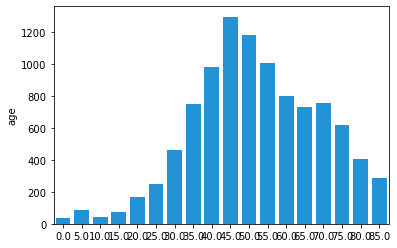

In [7]:
# Let's take a look at the age distribution just for good measure.
sns.barplot(x=df.age.value_counts().index, y=df.age.value_counts(), color='xkcd:azure')